<h1 style="text-align:center; color:#05ABE0"> Comunidad de práctica IA </h1>

### Recursos consultados

* [Limpieza de datos](https://elitedatascience.com/data-cleaning)

In [22]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [23]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [24]:
# Cargar el dataset de hurtos filtrados por el municipio de Bogota
data = pd.read_excel('/content/drive/My Drive/hurtos_bogota_2010-2019.xlsx')

In [25]:
# data["Hora"].str.split(':', expand=True)
pd.to_datetime(data["Hora"]).dt.hour

0          0
1         14
2          9
3         19
4         20
          ..
483727    14
483728     4
483729     4
483730     9
483731    12
Name: Hora, Length: 483732, dtype: int64

In [26]:
data["Periodo_dia"] = None
data.loc[data[(data["Hora"] >= "00:00:00") &  (data["Hora"] < "06:00:00")].index, "Periodo_dia"] = "Madrugada"
data.loc[data[(data["Hora"] >= "06:00:00") &  (data["Hora"] < "12:00:00")].index, "Periodo_dia"] = "Mañana"
data.loc[data[(data["Hora"] >= "12:00:00") &  (data["Hora"] < "19:00:00")].index, "Periodo_dia"] = "Tarde"
data.loc[data[(data["Hora"] >= "19:00:00") &  (data["Hora"] <= "23:59:59")].index, "Periodo_dia"] = "Noche"

In [27]:
data.groupby("Periodo_dia").size()

Periodo_dia
Madrugada     93037
Mañana       137605
Noche         93098
Tarde        159992
dtype: int64

In [28]:
 categories = ["Lunes", "Martes", "Miércoles", "Jueves", "Viernes", "Sábado", "Domingo"]
 data["Día"] = pd.Categorical(data["Día"], categories=categories, ordered=True)
 print(f'Valores del día (int) \n{data["Día"].cat.codes.value_counts()}')
 print(f'{"=+=+"*10}')
 print(f'Valores del día (str) \n{data["Día"].value_counts()}')

Valores del día (int) 
4    82951
3    75559
2    75405
1    74437
5    68910
0    62772
6    43698
dtype: int64
=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+
Valores del día (str) 
Viernes      82951
Jueves       75559
Miércoles    75405
Martes       74437
Sábado       68910
Lunes        62772
Domingo      43698
Name: Día, dtype: int64


In [29]:
data["Periodo_dia"] = data["Periodo_dia"].astype('category')
data["Periodo_dia"].cat.codes.value_counts()

3    159992
1    137605
2     93098
0     93037
dtype: int64

[Text(0, 0.5, 'Cantidad de robos por días de cada mes'),
 Text(0.5, 0, 'Meses del año')]

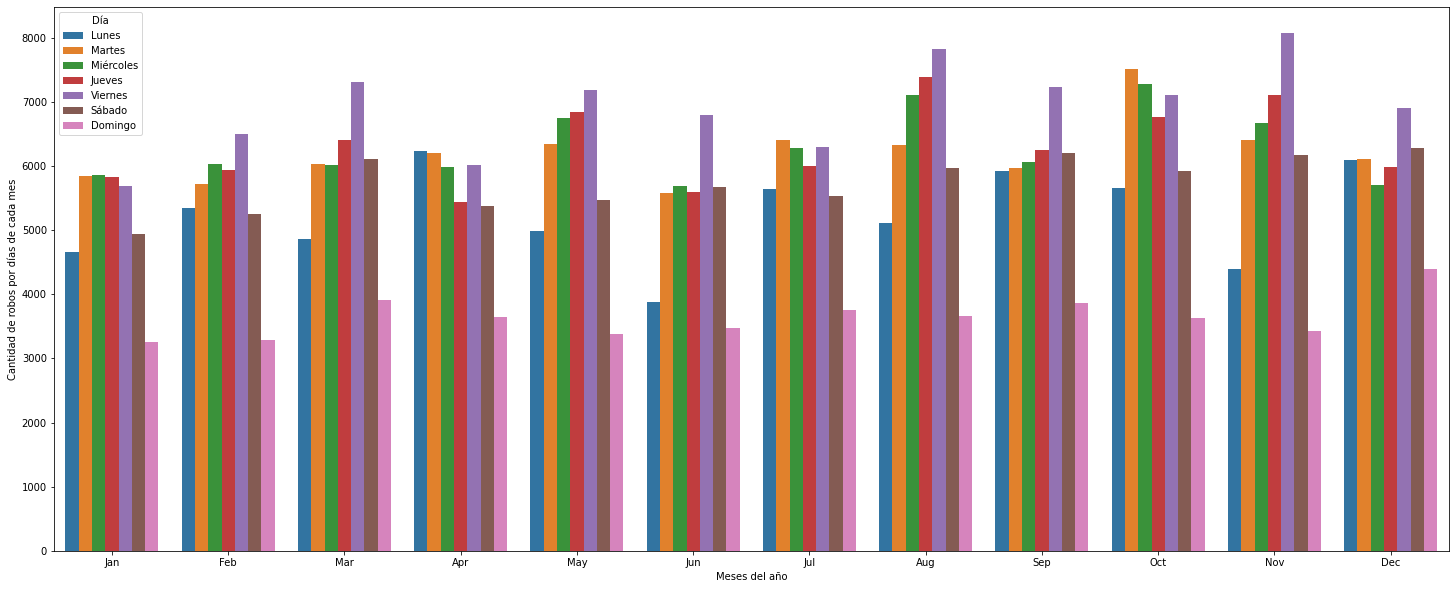

In [30]:
plt.figure(figsize=(25,10))
plot = sns.countplot(x="Mes", hue="Día", data=data)
plot.set(xlabel="Meses del año", ylabel="Cantidad de robos por días de cada mes")

[Text(0, 0.5, 'Cantidad de robos durante el día'),
 Text(0.5, 0, 'Meses del año')]

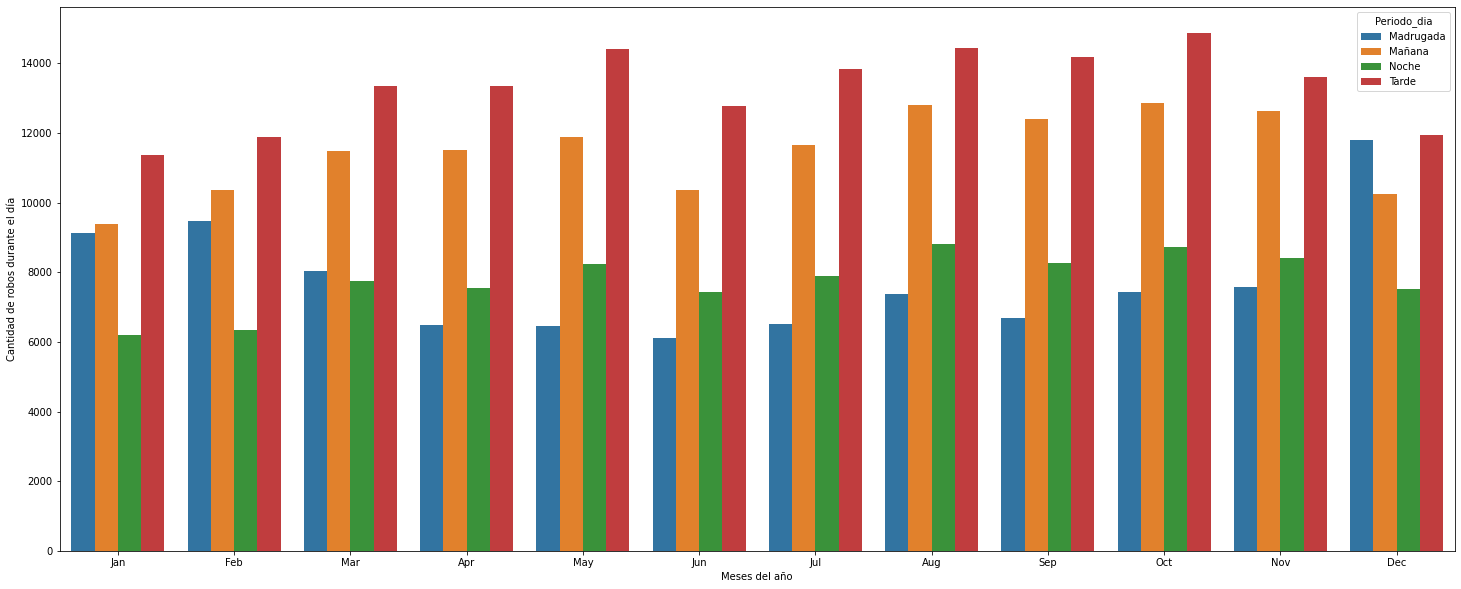

In [31]:
plt.figure(figsize=(25,10))
plot = sns.countplot(x="Mes", hue="Periodo_dia", data=data)
plot.set(xlabel="Meses del año", ylabel="Cantidad de robos durante el día")

In [33]:
!pwd

/content/drive/My Drive/P1_Hurtos_Bogota


In [55]:
# cd drive/My\ Drive/P1_Hurtos_Bogota


data	 Makefile   README.md	requirements.txt  test_environment.py
docs	 models     references	setup.py	  tox.ini
LICENSE  notebooks  reports	src


### Descomentar al momento de subir

<!-- # !git add . # Cambiar "." por nombre del notebook en caso de ser necesario
# !git commit -m "Se realiza el cambio en ..." # Agregar comentario de los cambios realizados
# !git pull
# !git push -u origin -->